# COVID-19 Global Data Tracker
This project is a data analysis and reporting tool that tracks global COVID-19 trends. It analyzes cases, deaths, recoveries, and vaccinations across countries and over time. The project involves cleaning and processing real-world data, performing exploratory data analysis (EDA), generating insights, and visualizing trends using Python data tools.

In [13]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [14]:
# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Data loading and Inspection

In [ ]:
# 1. Data Loading
#def load_data(file_path):
#"""Load COVID-19 dataset from CSV file"""
df = pd.read_csv(r"owid-covid-data.csv", parse_dates=['date'])
print("Data loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
#return df

Data loaded successfully!
Shape: (88866, 67)
Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hu

# Data cleaning

# Step 1: Handle Missing Values

In [ ]:
# Drop columns with >50% missing data
threshold = len(df) * 0.5
df_clean = df.dropna(thresh=threshold, axis=1)

# Fill missing numeric values with 0 (assuming no cases = 0)
numeric_cols = df_clean.select_dtypes(include=np.number).columns
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(0)

# Drop rows where critical columns are missing
df_clean = df_clean.dropna(subset=["date", "location", "total_cases"])

<ipython-input-5-7805ec14e870>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[numeric_cols] = df_clean[numeric_cols].fillna(0)


# Step 2: Filter Key Countries

In [ ]:
# Select countries of interest
countries = ["United States", "India", "Brazil", "Germany", "South Africa","Kenya"]
df_filtered = df_clean[df_clean["location"].isin(countries)]


Step 3: Calculate Derived Metrics

In [ ]:
# Compute death rate (deaths / cases)
df_filtered["death_rate"] = df_filtered["total_deaths"] / df_filtered["total_cases"]

# Normalize cases per million population
df_filtered["cases_per_million"] = df_filtered["total_cases"] / (df_filtered["population"] / 1e6)

# Vaccination rate (% population vaccinated)
df_filtered["vaccination_rate"] = df_filtered["new_people_vaccinated_smoothed_per_hundred"] / 100

<ipython-input-7-4a365975de89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["death_rate"] = df_filtered["total_deaths"] / df_filtered["total_cases"]
<ipython-input-7-4a365975de89>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["cases_per_million"] = df_filtered["total_cases"] / (df_filtered["population"] / 1e6)
<ipython-input-7-4a365975de89>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Step 4: Verify Cleaned Data

In [ ]:
df_filtered.dropna(inplace=True)

<ipython-input-8-df8674c3e697>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


In [ ]:
print(f"🧹 Cleaned data shape: {df_filtered.shape}")
print("🔍 Missing values per column:")
print(df_filtered.isnull().sum())

🧹 Cleaned data shape: (1330, 39)
🔍 Missing values per column:
iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
new_cases                                     0
new_cases_smoothed                            0
total_deaths                                  0
new_deaths                                    0
new_deaths_smoothed                           0
total_cases_per_million                       0
new_cases_per_million                         0
new_cases_smoothed_per_million                0
total_deaths_per_million                      0
new_deaths_per_million                        0
new_deaths_smoothed_per_million               0
reproduction_rate                             0
new_vaccinations_smoothed                     0
new_vaccinations_smoothed_per_million         0
new_people_vaccinated_smoo

# Exploratory Data Analysis

Time-Series Trends (Cases & Deaths)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


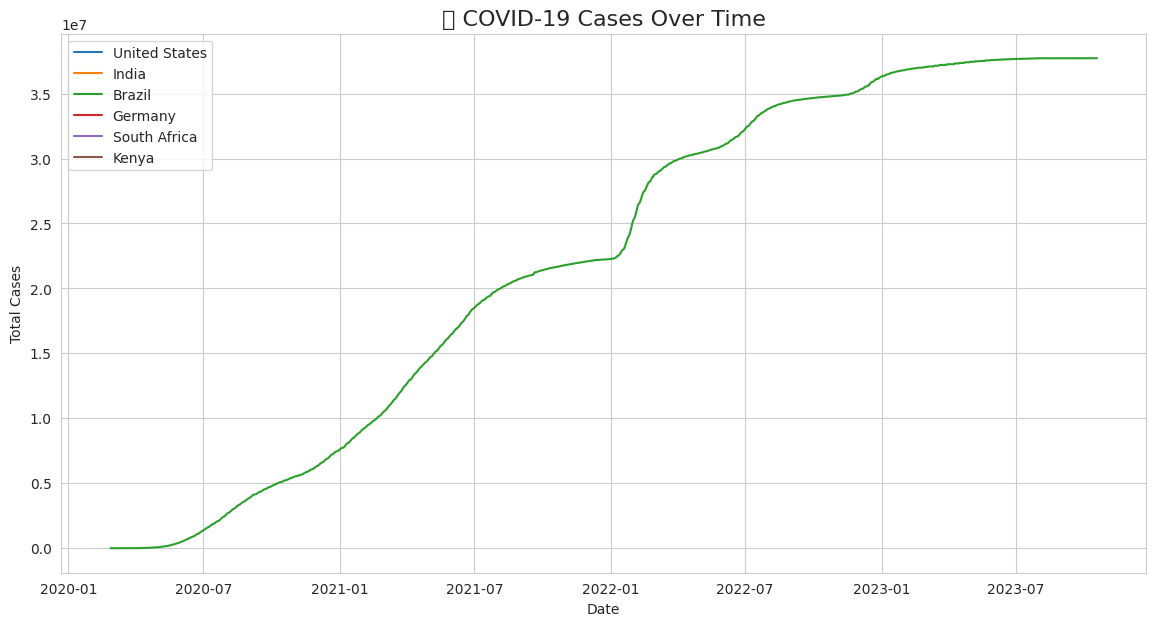

In [ ]:
plt.figure(figsize=(14, 7))
for country in countries:
    country_data = df_filtered[df_filtered["location"] == country]
    plt.plot(country_data["date"], country_data["total_cases"], label=country)

plt.title("📈 COVID-19 Cases Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()

Country Comparison (Latest Data)

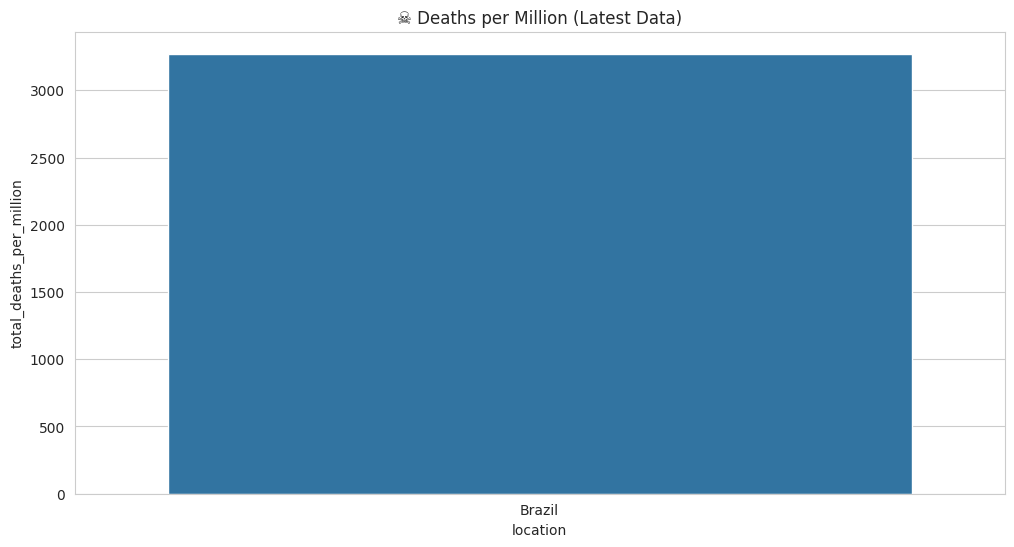

In [ ]:
latest_data = df_filtered.sort_values("date").groupby("location").last().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=latest_data, x="location", y="total_deaths_per_million")
plt.title("☠️ Deaths per Million (Latest Data)")
plt.show()

Vaccination Progress

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128137 (\N{SYRINGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


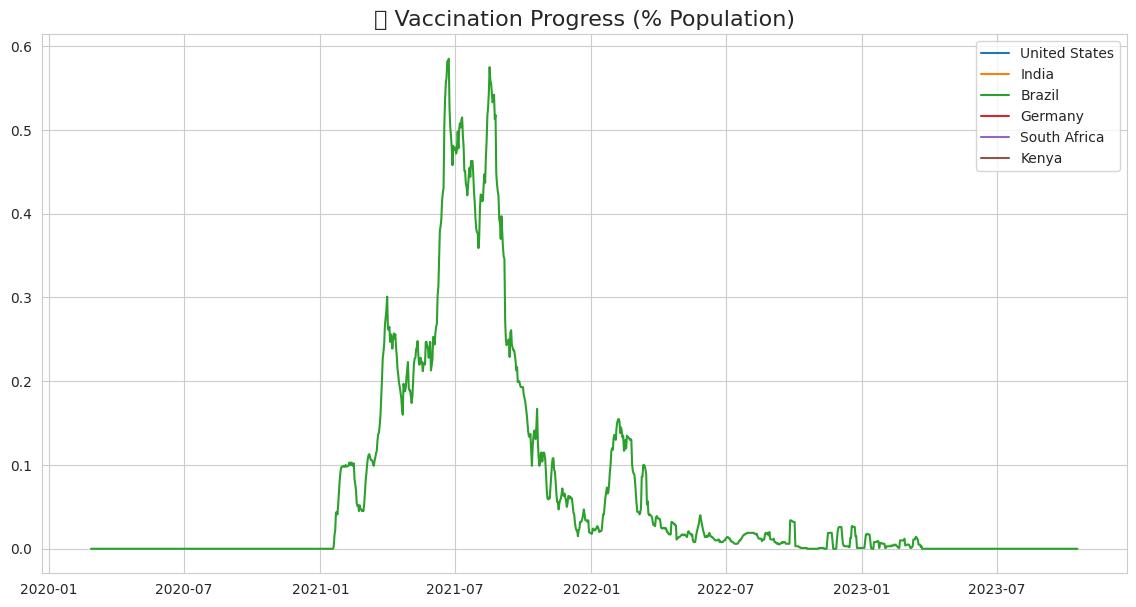

In [15]:
plt.figure(figsize=(14, 7))
for country in countries:
    country_data = df_filtered[df_filtered["location"] == country]
    plt.plot(country_data["date"], country_data["new_people_vaccinated_smoothed_per_hundred"], label=country)

plt.title("💉 Vaccination Progress (% Population)", fontsize=16)
plt.legend()
plt.show()

Advanced Analysis (Choropleth Map)

In [16]:
# Aggregate latest global data
latest_global = df_clean.sort_values("date").groupby("location").last().reset_index()

# Plot interactive map
fig = px.choropleth(
    latest_global,
    locations="iso_code",
    color="total_cases_per_million",
    hover_name="location",
    title="🌍 Global COVID-19 Cases per Million",
    color_continuous_scale="Viridis"
)
fig.show()